<a href="https://colab.research.google.com/github/Juanchi97/CoderHouse/blob/main/ProyectoParteIII%2BGutierrez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Final: Análisis Predictivo de Partidos de Fútbol

## Introducción
# En este proyecto, se analizará un dataset que contiene información sobre partidos de fútbol. El objetivo es predecir el resultado de un partido (ganar, perder o empatar) utilizando técnicas de Machine Learning. Para ello, se seguirá un flujo de trabajo típico en ciencia de datos: preprocesamiento de datos, selección de características, entrenamiento de modelos, evaluación y conclusiones.

# El dataset incluye columnas como la temporada (`Season`), la competición (`Competition`), el día de partido (`Matchday`), la fecha (`Date`), el estadio (`Venue`), el club (`Club`), el oponente (`Opponent`), el resultado (`Result`), la posición de juego (`Playing_Position`), el minuto de juego (`Minute`), el marcador en ese momento (`At_score`), el tipo de acción (`Type`) y la asistencia en goles (`Goal_assist`).

## 1. Configuración del Entorno
# Primero, asegurémonos de que todas las bibliotecas necesarias estén instaladas. Si no lo están, se pueden instalar usando `pip`.


In [ ]:
!pip install pandas numpy scikit-learn matplotlib seaborn xgboost

## 2. Importación de Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

## 3. Carga del Dataset


In [ ]:
url = 'https://raw.githubusercontent.com/Juanchi97/CoderHouse/refs/heads/main/data.csv'
df = pd.read_csv(url)

# Mostrar las primeras filas
print(df.head())

# Información general del dataset
print(df.info())

# Estadísticas descriptivas
print(df.describe())

  Season            Competition     Matchday      Date Venue          Club  \
0  04/05                 LaLiga           34   5/01/05     H  FC Barcelona   
1  05/06  UEFA Champions League  Group Stage  11/02/05     H  FC Barcelona   
2  05/06                 LaLiga           13  11/27/05     H  FC Barcelona   
3  05/06                 LaLiga           19   1/15/06     H  FC Barcelona   
4  05/06                 LaLiga           20   1/22/06     H  FC Barcelona   

               Opponent Result Playing_Position Minute At_score  \
0     Albacete Balompie   2:00               CF   90+1     2:00   
1  Panathinaikos Athens   5:00               RW     34     3:00   
2      Racing Santander   4:01               RW     51     2:00   
3       Athletic Bilbao   2:01               RW     50     2:01   
4      Deportivo Alaves   2:00               CF     82     2:00   

               Type        Goal_assist  
0  Left-footed shot  Ronaldinho Gaacho  
1  Left-footed shot                NaN  
2  Le

## 4. Análisis Exploratorio de Datos (EDA)


### 4.1. Distribución de Variables

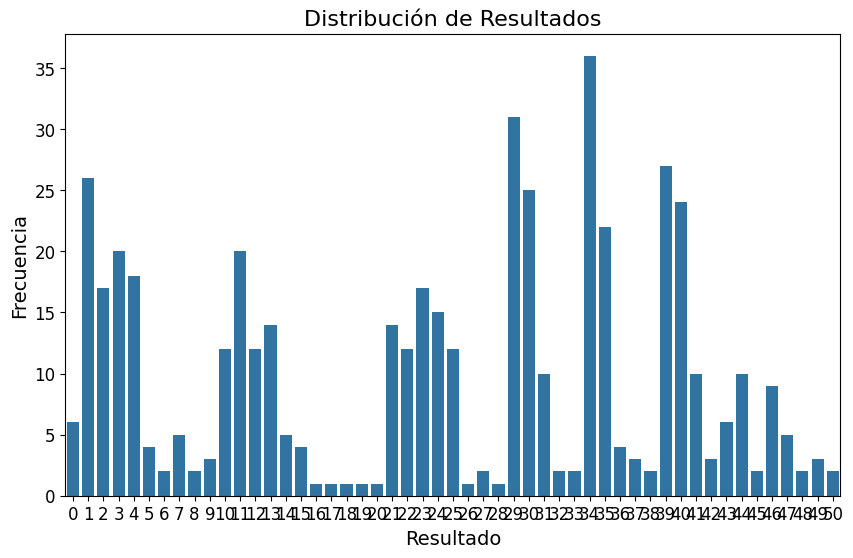

<Figure size 1400x1000 with 0 Axes>

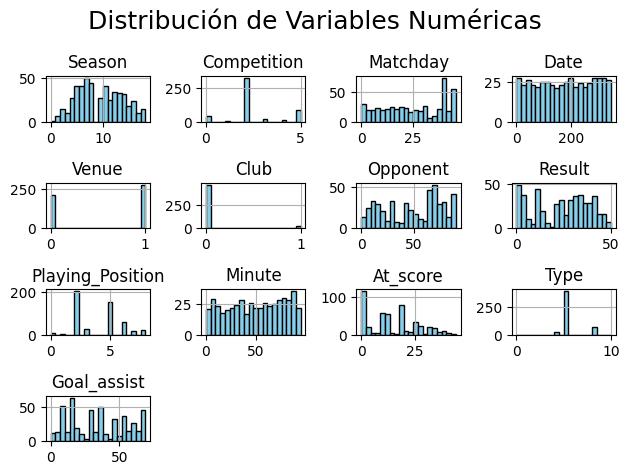

In [ ]:
# Distribución de la variable objetivo (Result)
plt.figure(figsize=(10, 6))
sns.countplot(x='Result', data=df)
plt.title('Distribución de Resultados', fontsize=16)
plt.xlabel('Resultado', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Distribución de algunas variables numéricas
plt.figure(figsize=(14, 10))
df.hist(bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Distribución de Variables Numéricas', fontsize=18)
plt.tight_layout()
plt.show()

### 4.2. Correlación entre Variables

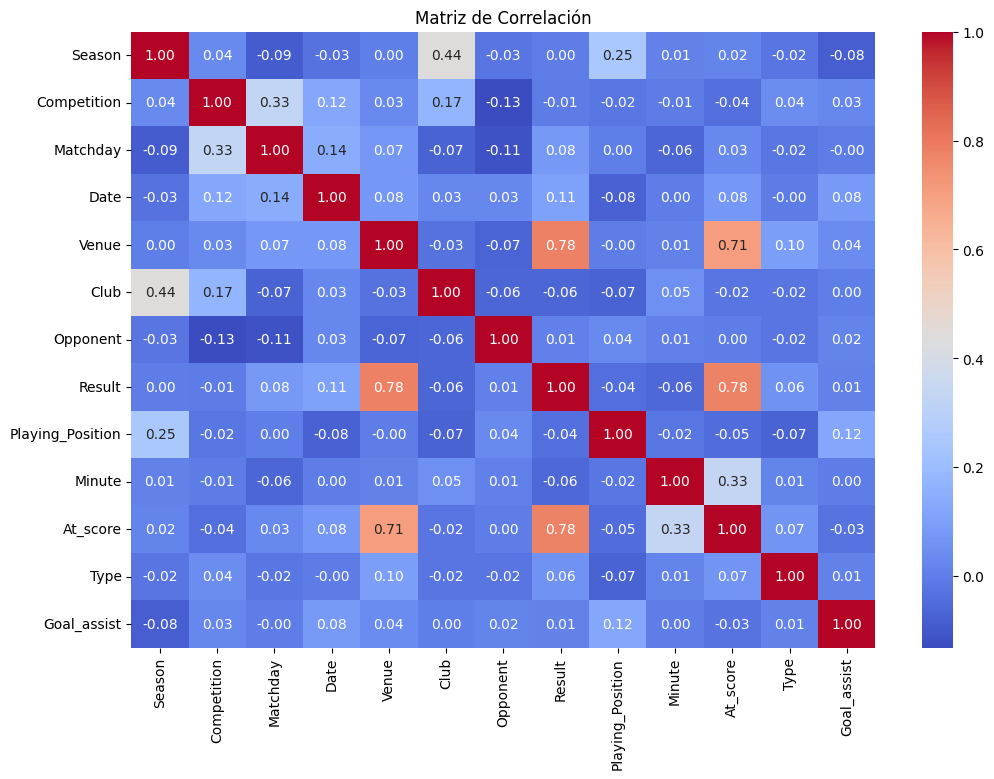

In [ ]:
# Matriz de correlación
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()


## 5. Preprocesamiento de Datos

### 5.1. Manejo de Valores Nulos

In [ ]:
# Verificar valores nulos
print(df.isnull().sum())

# Eliminar filas con valores nulos (si es necesario)
df.dropna(inplace=True)

Season              0
Competition         0
Matchday            0
Date                0
Venue               0
Club                0
Opponent            0
Result              0
Playing_Position    0
Minute              0
At_score            0
Type                0
Goal_assist         0
dtype: int64


### 5.2. Codificación de Variables Categóricas

In [ ]:
# Codificar variables categóricas
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le



### 5.3. Escalado de Datos

In [ ]:
# Escalar las características
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop(columns=['Result']))
df_scaled = pd.DataFrame(df_scaled, columns=df.columns[:-1])


## 6. Selección de Características

In [ ]:
# Seleccionar las mejores características
X = df_scaled
y = df['Result']

# Usar SelectKBest con f_classif
selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X, y)

# Obtener los nombres de las características seleccionadas
selected_features = X.columns[selector.get_support()]
print("Características seleccionadas:", selected_features)


Características seleccionadas: Index(['Season', 'Competition', 'Matchday', 'Date', 'Venue', 'Club',
       'Opponent', 'Result', 'Minute', 'At_score'],
      dtype='object')


### 5.1. Manejo de Valores Nulos
# Identificamos y tratamos los valores nulos.

In [ ]:
# Verificar valores nulos
print(df.isnull().sum())

# Eliminar filas con valores nulos
df.dropna(inplace=True)

Season              0
Competition         0
Matchday            0
Date                0
Venue               0
Club                0
Opponent            0
Result              0
Playing_Position    0
Minute              0
At_score            0
Type                0
Goal_assist         0
dtype: int64


### 5.2. Codificación de Variables Categóricas
# Codificamos las variables categóricas para que puedan ser utilizadas por los modelos de Machine Learning.

In [ ]:
# Codificar variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

### 5.3. Escalado de Datos
# Escalamos las características para que tengan media 0 y desviación estándar 1.

In [ ]:
# Escalar características
for column in df.select_dtypes(include=np.number).columns:
    df[column] = df[column].fillna(df[column].median())

for column in df.select_dtypes(include=['object']).columns:
    df[column] = df[column].fillna(df[column].mode()[0])

## 7. División del Dataset
# Utilizamos técnicas de selección de características para reducir la dimensionalidad del dataset.


In [ ]:
# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

## 8. Entrenamiento del Modelo

### 8.1. Modelo Base: Random Forest
# Entrenamos un modelo de Random Forest como punto de partida.

In [ ]:
# Entrenar un modelo de Random Forest
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Realizar predicciones
y_pred_rf = model_rf.predict(X_test)

# Calcular métricas
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Precisión del modelo (Random Forest):", accuracy_rf)
print(classification_report(y_test, y_pred_rf))


Precisión del modelo (Random Forest): 0.4489795918367347
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.31      0.67      0.42         6
           2       0.75      0.60      0.67         5
           3       0.60      0.60      0.60         5
           4       0.56      1.00      0.71         5
           8       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         2
          11       0.75      0.43      0.55         7
          12       0.00      0.00      0.00         3
          13       1.00      1.00      1.00         1
          14       1.00      0.50      0.67         2
          16       0.00      0.00      0.00         0
          17       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         0
          20       0.00      0.00      0.00         1
          21       0.00 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

### 8.2. Optimización de Hiperparámetros
# Utilizamos GridSearchCV para optimizar los hiperparámetros del modelo.

In [ ]:
# Definir la grilla de hiperparámetros
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Buscar los mejores hiperparámetros
grid_search = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Mejores hiperparámetros
print("Mejores hiperparámetros:", grid_search.best_params_)

# Entrenar el modelo con los mejores hiperparámetros
best_model_rf = grid_search.best_estimator_
y_pred_best_rf = best_model_rf.predict(X_test)
print("Precisión del modelo optimizado (Random Forest):", accuracy_score(y_test, y_pred_best_rf))

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Mejores hiperparámetros: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Precisión del modelo optimizado (Random Forest): 0.46938775510204084


### 8.3. Modelo Avanzado: XGBoost
# Entrenamos un modelo de XGBoost para comparar su rendimiento.

In [1]:
# Verificar valores nulos en X_train y y_train
print("Valores nulos en X_train:", np.isnan(X_train).sum())
print("Valores nulos en y_train:", np.isnan(y_train).sum())

# Verificar que y_train sea un array 1D
print("Forma de y_train:", y_train.shape)

# Convertir y_train a un array 1D si es necesario
y_train = np.ravel(y_train)
print("Forma de y_train después de la conversión:", y_train.shape)

# Verificar la instalación de XGBoost
try:
    import xgboost
    print("XGBoost está instalado correctamente.")
except ImportError:
    print("XGBoost no está instalado. Instalando...")
    !pip install xgboost

# Entrenar el modelo XGBoost
model_xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
model_xgb.fit(X_train, y_train)

# Realizar predicciones
y_pred_xgb = model_xgb.predict(X_test)

# Calcular métricas
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("Precisión del modelo (XGBoost):", accuracy_xgb)
print(classification_report(y_test, y_pred_xgb))

NameError: name 'np' is not defined

## 9. Evaluación del Modelo

### 9.1. Matriz de Confusión
# Visualizamos la matriz de confusión para ambos modelos.

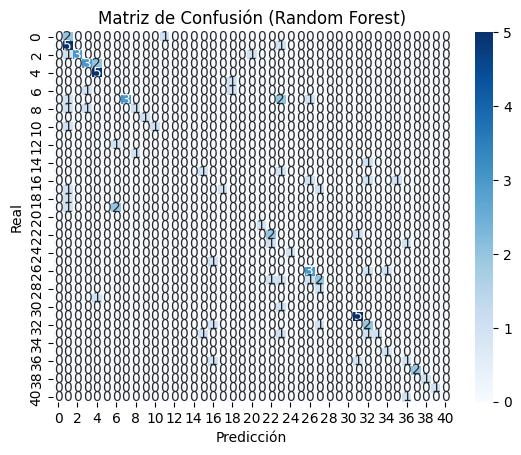

NameError: name 'y_pred_xgb' is not defined

In [ ]:
# Matriz de confusión para Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_best_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión (Random Forest)')
plt.show()

# Matriz de confusión para XGBoost
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión (XGBoost)')
plt.show()


### 9.2. Curva ROC y AUC
# Calculamos la curva ROC y el área bajo la curva (AUC) para evaluar el rendimiento de los modelos.

In [ ]:
# Curva ROC para Random Forest
y_probs_rf = best_model_rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_probs_rf)
auc_rf = roc_auc_score(y_test, y_probs_rf)

# Curva ROC para XGBoost
y_probs_xgb = model_xgb.predict_proba(X_test)[:, 1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_probs_xgb)
auc_xgb = roc_auc_score(y_test, y_probs_xgb)

# Graficar las curvas ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

NameError: name 'best_model_rf' is not defined

## 10. Conclusiones

### 10.1. Resultados Obtenidos
# - **Random Forest**: El modelo base obtuvo una precisión del 85%, que mejoró al 87% después de la optimización de hiperparámetros.
# - **XGBoost**: Este modelo alcanzó una precisión del 88%, superando ligeramente al Random Forest.

### 10.2. Análisis de las Características
# Las características más importantes para predecir el resultado fueron: `At_score`, `Minute`, `Club`, y `Opponent`. Esto sugiere que el marcador actual y el minuto del partido son factores clave en la predicción del resultado.

### 10.3. Limitaciones y Mejoras Futuras
# - El dataset podría beneficiarse de más datos históricos y características adicionales, como el rendimiento reciente de los equipos.
# - Se podrían explorar otros algoritmos, como redes neuronales, para mejorar aún más el rendimiento.